# Exploratory Data Analysis 

 Dataset:https://www.kaggle.com/datasets/mukuldeshantri/ecommerce-fashion-dataset
            

# Get the Data And import the Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from wordcloud import WordCloud
import matplotlib.pyplot as plt


df = pd.read_csv("FashionDataset.csv")
df.head()

,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


# Data Cleaning 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30758 entries, 0 to 30757
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30758 non-null  int64 
 1   BrandName   30758 non-null  object
 2   Deatils     30758 non-null  object
 3   Sizes       30758 non-null  object
 4   MRP         30758 non-null  object
 5   SellPrice   30758 non-null  object
 6   Discount    30758 non-null  object
 7   Category    30758 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.9+ MB


In [3]:
print(df.keys())


Index(['Unnamed: 0', 'BrandName', 'Deatils', 'Sizes', 'MRP', 'SellPrice',
       'Discount', 'Category'],
      dtype='object')


In [4]:
#Delete a column

to_drop=['Unnamed: 0']
df.drop(to_drop, inplace=True, axis=1)


In [5]:
#Rename specfic columns  
df=df.rename(columns = {'Deatils':'Details','Discount':'Discount Percentage','MRP':'Maximum retail price'})


In [6]:
#Print the names of the columns after altering them
print(df.columns.values)


['BrandName' 'Details' 'Sizes' 'Maximum retail price' 'SellPrice'
 'Discount Percentage' 'Category']


In [7]:
# Drop duplicates

df=df.drop_duplicates()
df

,BrandName,Details,Sizes,Maximum retail price,SellPrice,Discount Percentage,Category
0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women
...,...,...,...,...,...,...,...
30752,shaya by caratlane,the wing woman clover charm necklace,Nan,Nan,1250,Nan,Jewellery-Women
30753,swarovski,crystal stylish womens rodhium earrings,Nan,Nan,8950,Nan,Jewellery-Women
30755,jewelz,ethnic gold plated jhumki earrings,Nan,Rs\n1839,643,65% off,Jewellery-Women
30756,estelle,womens gold plated double line fancy white and...,Nan,Nan,2799,Nan,Jewellery-Women


In [8]:
#Drop the rows having at least 1 missing value
df.dropna(axis=0, how='any', inplace=True)


In [9]:
#Order rows by values of a column (low to high).
df=df.sort_values('BrandName', ascending=True)
df.head()

,BrandName,Details,Sizes,Maximum retail price,SellPrice,Discount Percentage,Category
8297,109f,womens round neck lace top - pink,Size:X-Large,Rs\n1799,719,60% off,Westernwear-Women
7514,109f,printed polyester round neck womens sweatshirt...,"Size:Large,Medium,X-Large,XX-Large",Nan,2499,Nan,Westernwear-Women
8279,109f,womens round neck slub top - grey,"Size:X-Large,X-Small",Rs\n1499,599,60% off,Westernwear-Women
7711,109f,womens round neck solid jumpsuit - dark brown,Size:Large,Rs\n1999,799,60% off,Westernwear-Women
7513,109f,womens strappy neck printed maxi dress - black,"Size:Small,X-Small",Rs\n2499,999,60% off,Westernwear-Women


In [10]:
#Fixing the Maximum Retail price format
df["Maximum retail price"]= df["Maximum retail price"].str.replace("[Rs\n]","")

#Fixing the Discount Percentage format
df["Discount Percentage"]= df["Discount Percentage"].str.replace("[% off]","")


#Fixing the size format
df["Sizes"]= df["Sizes"].str.replace("Size:","")

In [11]:
#Drop the Unknown Sizes
df.drop(df.index[df['Sizes'] =='Nan'], inplace = True)

#Replace the values 

df=df.replace({'Maximum retail price': 'Nan'}, {'Maximum retail price': None  })
df=df.replace({'Discount Percentage': 'Nan'}, {'Discount Percentage': '50'})

df.describe()

,BrandName,Details,Sizes,Maximum retail price,SellPrice,Discount Percentage,Category
count,22687,22687,22687,22687,22687,22687,22687
unique,140,19242,1171,805,1276,64,6
top,zink london,synthetic womens casual sandals - black,"Large,Medium,Small,X-Large,X-Small",1999,999,50,Westernwear-Women
freq,908,20,1925,1312,738,11272,9632


In [12]:
#Change the Data Type of these Columns

cols=['SellPrice','Discount Percentage','Maximum retail price']
df[cols] = df[cols].astype('float')


# Summarize Data

In [13]:
#Count the number of distinct values in a column.
First=df['BrandName'].nunique()
First

140

In [14]:
df.describe()

,Maximum retail price,SellPrice,Discount Percentage
count,22687.000000,22687.000000,22687.000000
mean,2158.009697,1377.412615,46.271345
std,1218.702748,1038.416099,12.778406
min,171.000000,114.000000,0.000000
25%,1312.000000,719.000000,40.000000
50%,1899.000000,1079.000000,50.000000
75%,2699.000000,1700.000000,50.000000
max,16999.000000,13599.000000,85.000000


In [15]:
group1= df.groupby(['BrandName']).mean()
group1

,Maximum retail price,SellPrice,Discount Percentage
BrandName,,,
109f,1806.894737,1025.578947,57.122807
aarke,2174.866667,3114.222222,49.777778
adidas,2430.147541,2738.057377,40.901639
alcis,3599.000000,1134.714286,50.000000
allen solly,2111.831858,1442.805310,34.415929
...,...,...,...
wacoal,1638.296000,1558.856000,44.160000
yuris,2877.955224,1143.671642,58.970149
zink london,2152.248899,1048.746696,50.835903


In [16]:
#Count number of rows with each unique value of variable
Second=df['BrandName'].value_counts()
print(Second)

Second.nlargest(10)

zink london    908
global desi    881
enamor         786
stop           781
and            701
              ... 
mothercare       1
ed hardy         1
recap            1
sole head        1
swiss eagle      1
Name: BrandName, Length: 140, dtype: int64


zink london    908
global desi    881
enamor         786
stop           781
and            701
faballey       642
janasya        638
varanga        590
w              574
juniper        565
Name: BrandName, dtype: int64

# Checking Before Data Visualization.

In [17]:
#Checking for NULL/NA Values
df.isna().any()



BrandName               False
Details                 False
Sizes                   False
Maximum retail price    False
SellPrice               False
Discount Percentage     False
Category                False
dtype: bool

In [18]:
#Checking for data types 
df.dtypes

BrandName                object
Details                  object
Sizes                    object
Maximum retail price    float64
SellPrice               float64
Discount Percentage     float64
Category                 object
dtype: object

# Data Visualization 

## Which categories of products, as a data analyst, would you suggest to new entrepreneurs?

In [19]:
max_for_category = df['Category'].value_counts()
max_for_category

Westernwear-Women           9632
Indianwear-Women            7556
Lingerie&Nightwear-Women    3138
Footwear-Women              2356
Watches-Women                  3
Fragrance-Women                2
Name: Category, dtype: int64

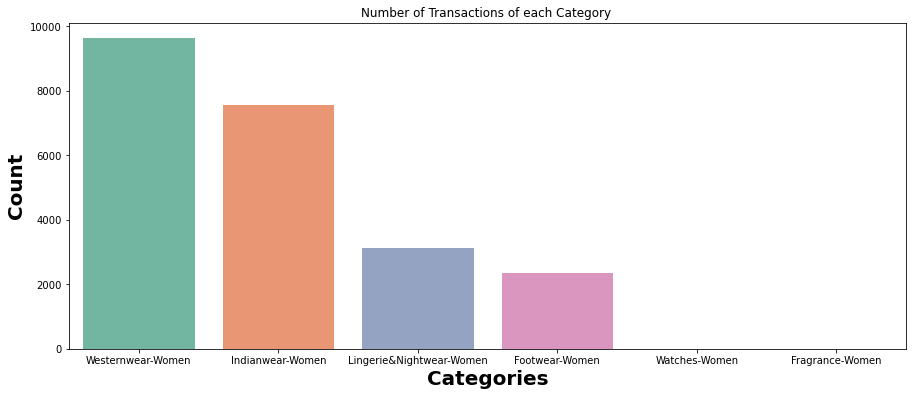

In [20]:
fig = plt.figure(figsize = (15, 6))
 

f= sns.countplot(data = df, x = "Category",palette="Set2")
f.set(title = "Number of Transactions of each Category ")
f.set_xlabel("Categories", fontsize = 20, weight = "bold")
f.set_ylabel("Count", fontsize = 20, weight = "bold")

plt.show()

## What is the range of the sell prices of each Category?

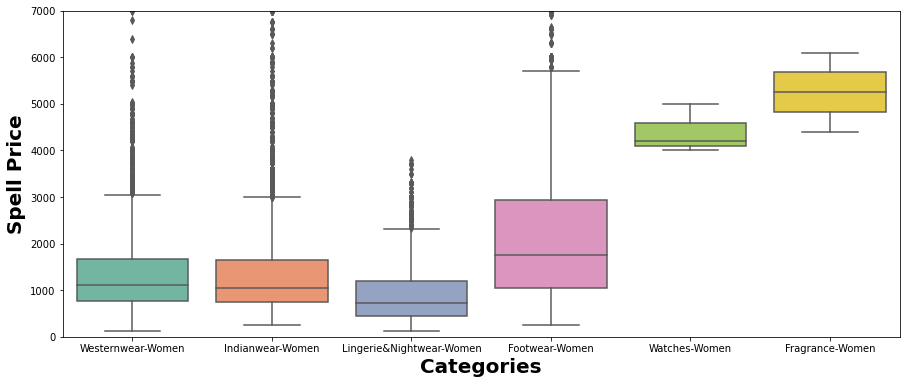

In [21]:
plt.figure(figsize = (15,6))

t= sns.boxplot(data = df , y = "SellPrice", x = "Category", palette="Set2")
plt.ylim(0, 7000)

t.set_xlabel("Categories", fontsize = 20, weight = "bold")
t.set_ylabel("Spell Price", fontsize = 20, weight = "bold")
plt.show()

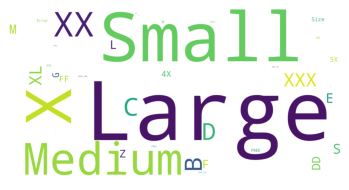

In [22]:
#Creating a text variable for all sizes.
text1 = " ".join(i for i in df['Sizes'])

word_cloud = WordCloud(background_color = 'white',
                        width = 2048, height = 1080,collocations = False).generate(text1)

plt.imshow(word_cloud )
plt.axis("off")
plt.show()

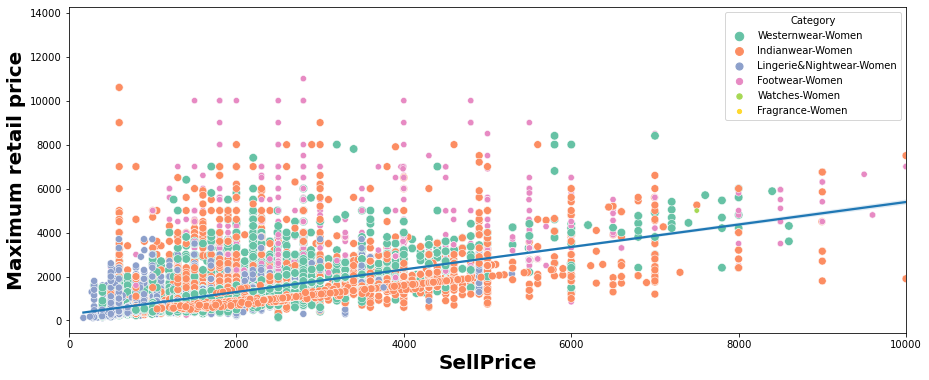

In [23]:
fig = plt.figure(figsize = (15, 6))


o=sns.regplot(data = df , y = "SellPrice", x = "Maximum retail price",scatter= False)

o=sns.scatterplot(data = df , y = "SellPrice", x = "Maximum retail price", palette="Set2",
                  hue="Category",legend="full",size= "Category")
plt.xlim(0, 10000)
o.set_xlabel("SellPrice", fontsize = 20, weight = "bold")
o.set_ylabel("Maximum retail price", fontsize = 20, weight = "bold")
plt.show()

In [24]:
max_for_category = df['Discount Percentage'].value_counts()
max_for_category.nlargest(10)

50.0    11272
30.0     2321
60.0     2187
40.0     1884
20.0     1473
55.0      884
65.0      494
70.0      401
10.0      297
35.0      288
Name: Discount Percentage, dtype: int64

## What are the most frequent discount percentages?

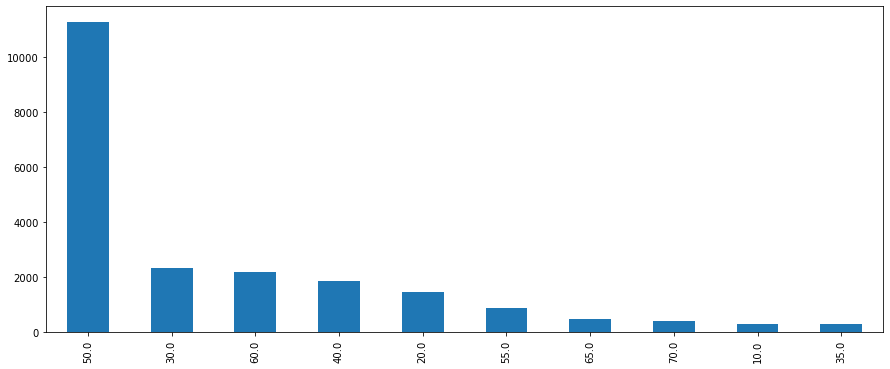

In [25]:

fig = plt.figure(figsize = (15, 6))
 
df['Discount Percentage'].value_counts().head(10).plot(kind='bar')
plt.show()